In [119]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

sns.set_style('dark')

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
print("Training data : {}".format(train_data.shape))
print("Test data shape: {}".format(test_data.shape))

Training data : (891, 12)
Test data shape: (418, 11)


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [6]:
print(pd.DataFrame(data = np.array(train_data.groupby('Survived').size()),
                   index = ['Not-Survived','Survived'],
                   columns = ['Count']))

              Count
Not-Survived    549
Survived        342


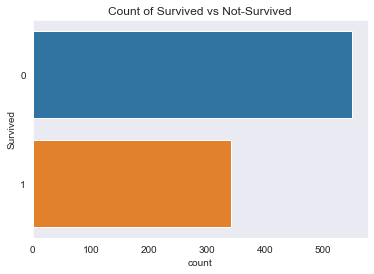

In [7]:
plot = sns.countplot(y = train_data.Survived)
plot.set_title('Count of Survived vs Not-Survived');

## Feature Analysis and Creation

### Gender

Text(0, 0.5, 'Survival Rate')

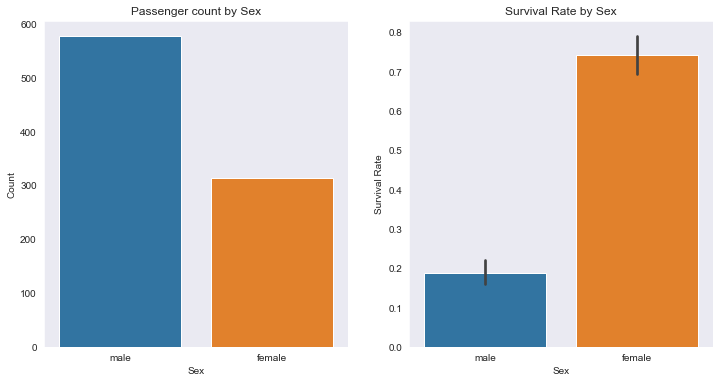

In [8]:
fig, axs = plt.subplots(1,2, figsize = (12,6))
a = sns.countplot(train_data['Sex'], ax = axs[0])
a.set_title('Passenger count by Sex')
a.set_ylabel('Count')

b = sns.barplot(x = 'Sex', y = 'Survived', data = train_data, ax = axs[1])
b.set_title('Survival Rate by Sex')
b.set_ylabel('Survival Rate')

### PClass

In [9]:
train_data.groupby('Pclass').Survived.mean()

# We see that 62% people travelling in Pclass 1 survived and only 24% survived who were travelling in Pclass 3

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

Text(0, 0.5, 'Count')

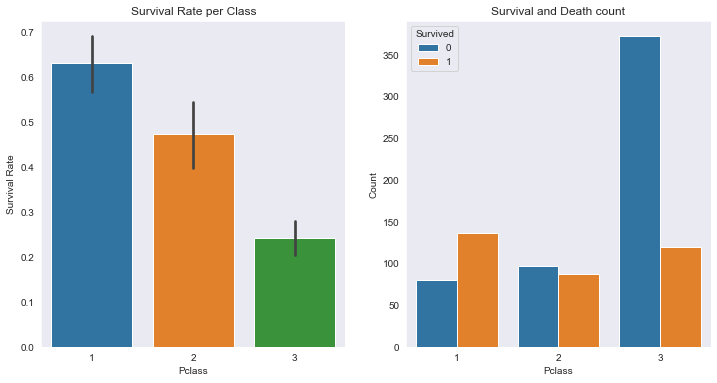

In [10]:
fig, ax = plt.subplots(1, 2, figsize = (12, 6))
a = sns.barplot(x = 'Pclass', y = 'Survived', data = train_data, ax = ax[0])
a.set_title('Survival Rate per Class')
a.set_ylabel('Survival Rate')

b = sns.countplot(x = 'Pclass', hue = 'Survived', data = train_data, ax = ax[1])
b.set_title('Survival and Death count')
b.set_ylabel('Count')

In [11]:
train_data.groupby(['Pclass', 'Sex']).Survived.mean()

# We see that 96% and 92% of the women of Pclass 1 and 2 survived respectively
# Whereas in Pclass 3 the percentage dropped to 50%

Pclass  Sex   
1       female    0.968085
        male      0.368852
2       female    0.921053
        male      0.157407
3       female    0.500000
        male      0.135447
Name: Survived, dtype: float64

Text(0, 0.5, 'Survival Rate')

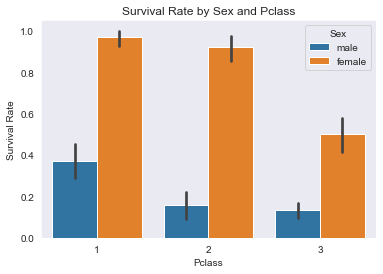

In [12]:
plot = sns.barplot(x = 'Pclass', y = 'Survived', hue = 'Sex', data = train_data)
plot.set_title('Survival Rate by Sex and Pclass')
plot.set_ylabel('Survival Rate')

### Embarked

Text(0, 0.5, 'Count')

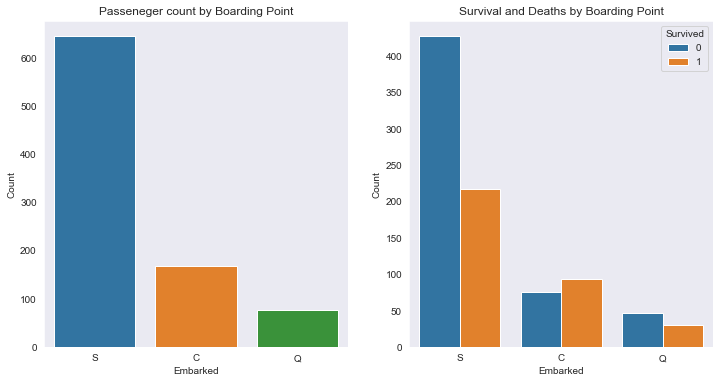

In [20]:
fig, axs = plt.subplots(1, 2, figsize = (12, 6))

a = sns.countplot(train_data['Embarked'], ax = axs[0])
a.set_title('Passeneger count by Boarding Point')
a.set_ylabel('Count')

b = sns.countplot(x = 'Embarked', hue = 'Survived', data = train_data, ax = axs[1])
b.set_title('Survival and Deaths by Boarding Point')
b.set_ylabel('Count')

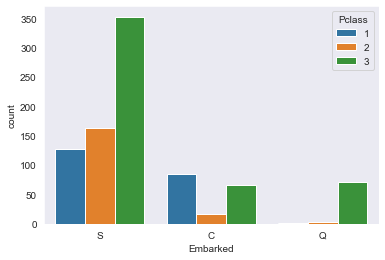

In [24]:
plt.figure()
sns.countplot(x = 'Embarked', hue = 'Pclass', data = train_data)

### Fare

Text(0, 0.5, 'Survival Rate')

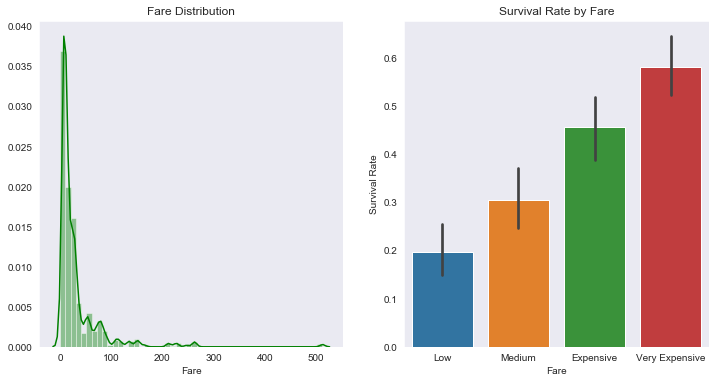

In [29]:
fig, axs = plt.subplots(1, 2, figsize = (12,6))

a = sns.distplot(train_data['Fare'], ax = axs[0], color = 'green')
a.set_title('Fare Distribution')

fare_ranges = pd.qcut(train_data['Fare'], 4, labels = ['Low', 'Medium', 'Expensive', "Very Expensive"])

b = sns.barplot(x = fare_ranges, y = train_data['Survived'], ax = axs[1])
b.set_title('Survival Rate by Fare')
b.set_ylabel('Survival Rate')

# Here we see that people who bought expensive and very expensive tickets had higher survival rates

### SibSp and Parch

Text(0, 0.5, 'Survival Rate')

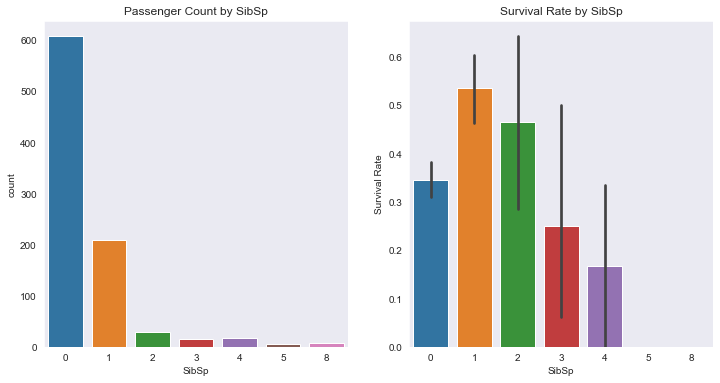

In [33]:
# SibSp
fig, axs = plt.subplots(1, 2, figsize = (12, 6))

a = sns.countplot(train_data['SibSp'], ax = axs[0])
a.set_title('Passenger Count by SibSp')

b = sns.barplot(x = 'SibSp', y = 'Survived', data = train_data, ax = axs[1])
b.set_title('Survival Rate by SibSp')
b.set_ylabel('Survival Rate')

Text(0, 0.5, 'Survival Rate')

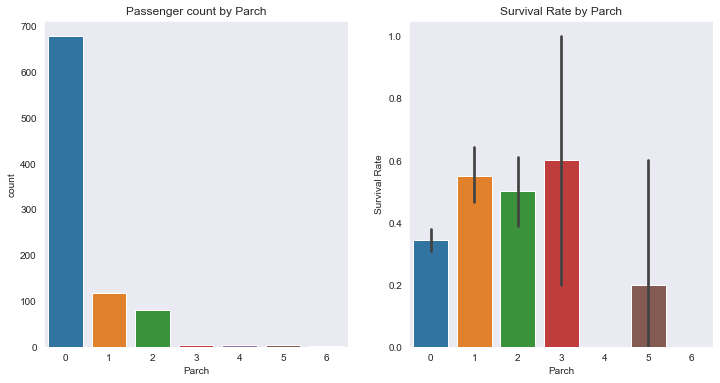

In [35]:
# Parch

fig, axs = plt.subplots(1, 2, figsize = (12, 6))

a = sns.countplot(train_data['Parch'], ax = axs[0])
a.set_title('Passenger count by Parch')

b = sns.barplot(x = 'Parch', y = 'Survived', data = train_data, ax = axs[1])
b.set_title('Survival Rate by Parch')
b.set_ylabel('Survival Rate')

#### Since we have two week predictors in Parch and SibSp, we can combine them and call is Family Size.

In [36]:
train_data['Fam_size'] = train_data['SibSp'] + train_data['Parch'] + 1

test_data['Fam_size'] = test_data['SibSp'] + test_data['Parch'] + 1

Text(0.5, 1.0, 'Survival Rate by Family Size')

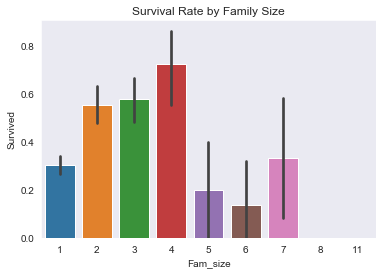

In [37]:
# Survival rate by family size:
plt.figure()
b = sns.barplot(x = 'Fam_size', y = 'Survived', data = train_data)
b.set_title('Survival Rate by Family Size')

## Modelling

In [107]:
# Selecting Features:

features = ['Pclass', 'Sex', 'Age', 'Embarked', 'Fare', 'Fam_size']

X_train = train_data[features].values
y_train = train_data['Survived'].values

X_test = test_data[features].values

In [108]:
numerical_cols = [2, 4]
categ_cols = [0, 1, 3]


In [109]:
numerical_imputer = SimpleImputer(strategy = 'median')
categ_imputer = SimpleImputer(strategy = 'most_frequent')

# Handling missing numerical values
X_train[:, numerical_cols] = numerical_imputer.fit_transform(X_train[:, numerical_cols])
X_test[:, numerical_cols] = numerical_imputer.fit_transform(X_test[:, numerical_cols])

# Handling missing categorical values

X_train[:, categ_cols] = categ_imputer.fit_transform(X_train[:, categ_cols])
X_test[:, categ_cols] = categ_imputer.fit_transform(X_test[:, categ_cols])

In [116]:
# Encoding categorical values:

encoder = ColumnTransformer(transformers = [('onehotencoder', OneHotEncoder(), categ_cols)], 
                           remainder = 'passthrough')

X_train = encoder.fit_transform(X_train)
X_test = encoder.fit_transform(X_test)

In [137]:
# Fitting the model:

clf = RandomForestClassifier(n_estimators = 500, max_depth = 5, random_state = 0)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [138]:
# Cross Validation Score
print("Cross Validation Score = {}"
      .format(cross_val_score(clf, X_train, y_train, cv = 10).mean()))

Cross Validation Score = 0.8249438202247191


In [144]:
# Making Predictions: 

y_pred = clf.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': y_pred})

output.to_csv('submission.csv', index = False)